In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
data = pd.read_csv("advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#data.drop(['Unnamed: 0'], axis=1)

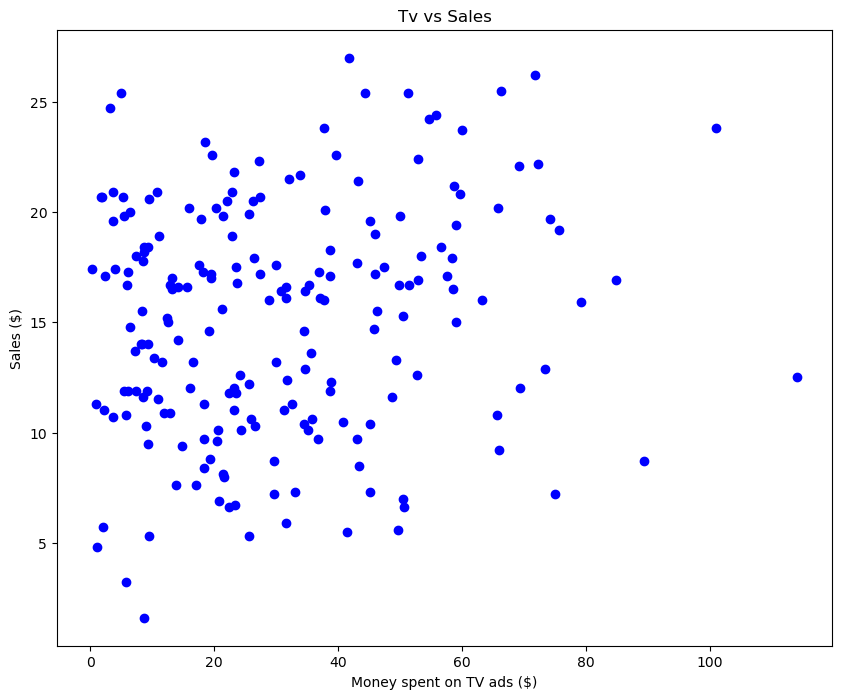

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(
    data['Newspaper'],
    data['Sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.title("Tv vs Sales")
plt.show()

In [8]:
X = data['TV']
y = data['Sales']

Xc= sm.add_constant(X)

In [23]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(Xc,y,test_size=.2,random_state=10)

## Simple linear regression 

In [37]:
y_test.shape

(40,)

In [24]:
# OLS (Statsmodels)
model= sm.OLS(y_train,x_train)
model1=model.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     664.5
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.76e-58
Time:                        15:11:42   Log-Likelihood:                -351.10
No. Observations:                 160   AIC:                             706.2
Df Residuals:                     158   BIC:                             712.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9948      0.353     19.804      0.0

In [12]:
# 1st part of the table
# DF
# F stat
# Measures of variations : Rsquared (Explained + unexplained variations)

In [25]:
model1.conf_int()


,0,1
const,6.297153,7.692382
TV,0.050528,0.058914


In [26]:
model1.params

const    6.994768
TV       0.054721
dtype: float64

In [27]:
model1.bse

const    0.353206
TV       0.002123
dtype: float64

In [28]:
model1.pvalues

const    1.169820e-44
TV       1.762418e-58
dtype: float64

<AxesSubplot:xlabel='TV', ylabel='Sales'>

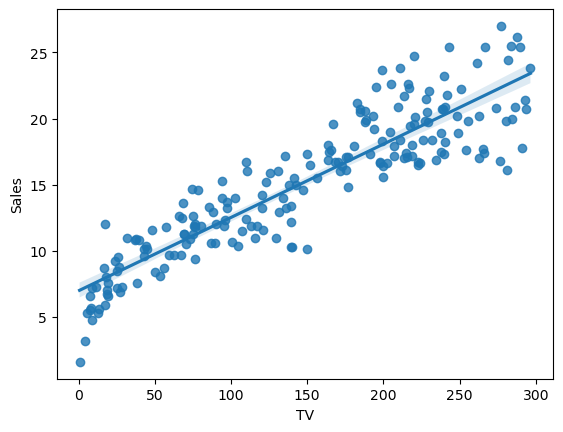

In [35]:
sns.regplot(x=X,y=y)

In [29]:
#SSE
#SSR
#SST

In [31]:
ypred=model1.predict(x_test)


In [40]:
SSR= np.sum((ypred-y_test.mean())**2) 
SSE= np.sum((y_test-ypred)**2)

In [41]:
SST=SSE+SSR


In [42]:
r_sq= SSR/SST
r_sq

0.8069453738703484

In [14]:
#2nd part of the table
# Coefficients
# std error
# t- stat
# P values
# confidance Interval

In [44]:
# Error metrics

# RMSE
# MAPE

from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,ypred))

2.6995191346084995

In [45]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
# if categorical?  

## Multiple linear regression 

In [47]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

Xc= sm.add_constant(X)

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(Xc,y,test_size=.2,random_state=10)

In [49]:
model= sm.OLS(y_train,x_train)
model2=model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     507.6
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.10e-80
Time:                        15:49:30   Log-Likelihood:                -292.99
No. Observations:                 160   AIC:                             594.0
Df Residuals:                     156   BIC:                             606.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7931      0.317     15.110      0.0

In [17]:
# Adjusted r-square

In [50]:
#3rd part of the table-----Assumptions

#1. linearity
# ccorrelation function
# scatter plot

data.corr()



,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


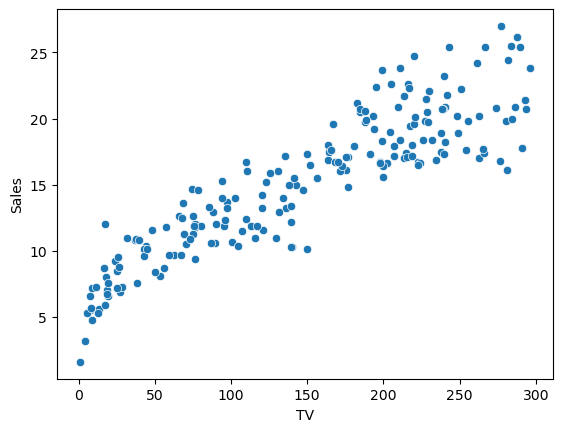

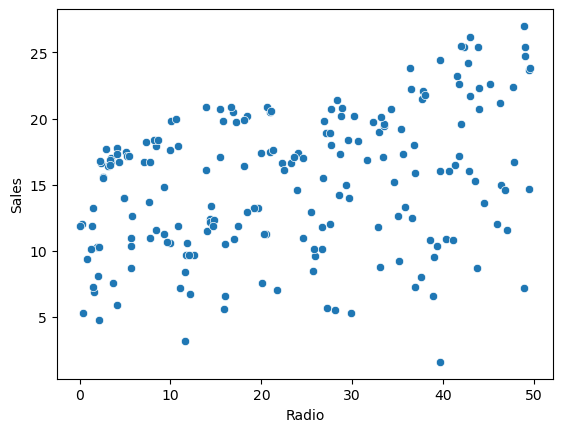

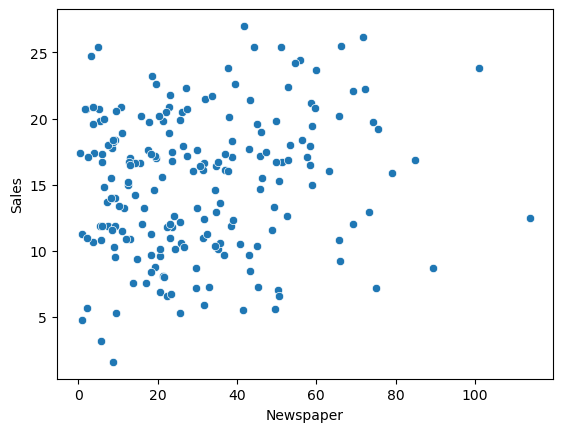

In [52]:
for col in X:
    sns.scatterplot(x=X[col],y=data['Sales'])
    plt.show()

In [56]:
#Linear rainbow test

from statsmodels.stats.diagnostic import linear_rainbow

t,p=linear_rainbow(model1,frac=.5)
p

0.6813339070657192

In [58]:
#2. Multi colinearity
# Correlation function
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif=pd.DataFrame()
vif['vif']=[VIF(X.values,i) for i in range(X.shape[1])]
vif['feat']=X.columns
vif.sort_values(by='vif',ascending=False)


,vif,feat
1,3.285462,Radio
2,3.055245,Newspaper
0,2.486772,TV


In [60]:
#3. Normality of residuals
# plots
# Shapiro wilk test
# Jerque bera test

model1.resid.skew()


0.11499117208995763

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

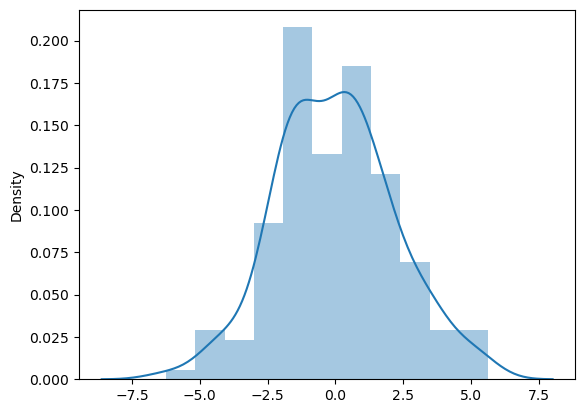

In [61]:
sns.distplot(x=model1.resid)

In [21]:
#4. Heteroskadasticity
# residual plot
# breusch pagan test

In [65]:
residual=y_test-ypred

<AxesSubplot:>

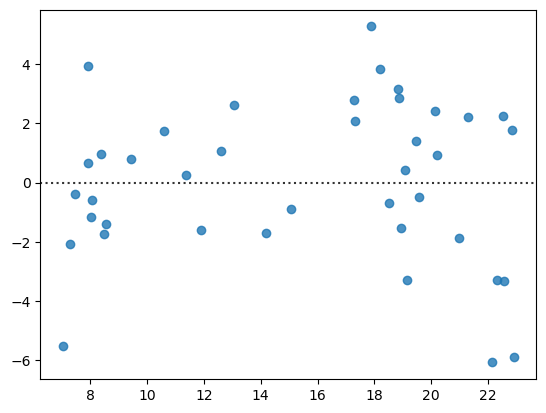

In [66]:
sns.residplot(x=ypred,y=residual)

<AxesSubplot:>

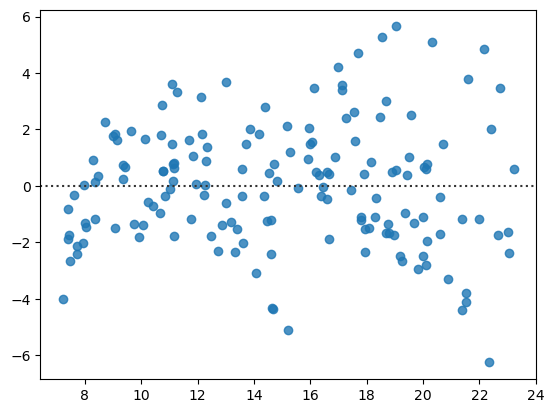

In [67]:
sns.residplot(x=model1.fittedvalues,y=model1.resid)

In [23]:
#5. auto corelation
# Residual plot
# Durbin watson test



In [24]:
# SKlearn function



In [25]:
# cross validation



In [26]:
# bias variance tradeoff